<a href="https://colab.research.google.com/github/mekaviraj/ML_sem5/blob/main/DLLL_sem_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://colab.research.google.com/drive/1cACIESZpC9N9GaJSUxEUqUI7rsiTZSrJ

# 19 january 2026 lab 1

In [ ]:
pip install --upgrade keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 39.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.10.0
    Uninstalling keras-3.10.0:
      Successfully uninstalled keras-3.10.0


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# Sample input
x = np.array([[2, 3]])

# Define the neural network model
def create_model(num_hidden_neurons):
    model = Sequential()
    # Input layer, one hidden layer with `num_hidden_neurons`, and output layer
    model.add(Dense(num_hidden_neurons, input_dim=2, activation='sigmoid'))  # 2 input features
    model.add(Dense(1, activation='sigmoid'))  # 1 output
    model.compile(optimizer=SGD(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Choose the number of neurons for the hidden layer (e.g., 2 neurons)
num_hidden_neurons = 2

# Create the model
model = create_model(num_hidden_neurons)

# Train the model (for demonstration purposes, we'll train on the same input, typically you use a dataset)
y = np.array([[0]])  # Dummy output (you can change it as needed)
model.fit(x, y, epochs=100, verbose=0)

# Use the trained model to make a prediction
prediction = model.predict(x)
print(prediction)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
[[0.23303671]]


# 2 february 2026 lab 2

In [ ]:
#Build a Simple Neural Network with PyTorch

import torch
import torch.nn as nn
import torch.optim as optim

x = torch.randn(100, 3) # 100 samples with 3 features each
y = torch.randn(100, 3)

class sample(nn.Module) :
  def __init__(self) :
    super().__init__()
    self.linear = nn.Linear(3 , 1)

    def forward(self, x) :
      return self.linear(x)

model = sample()



In [ ]:
# Implement AND and OR logic operations using a single perceptron, and verify the correctness of the output using appropriate truth tables. (linear Data)
import numpy as np

def step_function(x):
    return 1 if x >= 0 else 0
def perceptron(inputs, weights, bias):
    summation = np.dot(inputs, weights) + bias
    return step_function(summation)

truth_table_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
weights_and = np.array([1, 1])
bias_and = -1.5

print("--- AND Gate Truth Table Verification ---")
print("x1  x2 | Output")
for x in truth_table_inputs:
    result = perceptron(x, weights_and, bias_and)
    print(f"{x[0]}   {x[1]}  |   {result}")

print("\n" + "="*40 + "\n")

weights_or = np.array([1, 1])
bias_or = -0.5

print("--- OR Gate Truth Table Verification ---")
print("x1  x2 | Output")
for x in truth_table_inputs:
    result = perceptron(x, weights_or, bias_or)
    print(f"{x[0]}   {x[1]}  |   {result}")

--- AND Gate Truth Table Verification ---
x1  x2 | Output
0   0  |   0
0   1  |   0
1   0  |   0
1   1  |   1


--- OR Gate Truth Table Verification ---
x1  x2 | Output
0   0  |   0
0   1  |   1
1   0  |   1
1   1  |   1


In [ ]:
import numpy as np

def step(x):
    return 1 if x >= 0 else 0

class XOR_Network:
    def __init__(self):
        self.w_or = np.array([1, 1])
        self.b_or = -0.5

        self.w_and = np.array([1, 1])
        self.b_and = -1.5

        self.w_out = np.array([1, -2])
        self.b_out = -0.5

    def predict(self, x):
        h1 = step(np.dot(self.w_or, x) + self.b_or)     # OR result
        h2 = step(np.dot(self.w_and, x) + self.b_and)  # AND result

        output = step(self.w_out[0]*h1 + self.w_out[1]*h2 + self.b_out)
        return output

xor_gate = XOR_Network()

print("XOR Gate")
for x in [(0,0), (0,1), (1,0), (1,1)]:
    print(x, "->", xor_gate.predict(np.array(x)))


XOR Gate
(0, 0) -> 0
(0, 1) -> 1
(1, 0) -> 1
(1, 1) -> 0


# 9th february lab 3


In [ ]:
# Program No 9 and 10. Implement an MLP by varying bias, weights, and learning rate, and record observations for different learning rate values. Plot a graph showing the relationship between loss (error) and learning rate.
# MLP for XOR – Effect of Learning Rate on Loss
import numpy as np
import matplotlib.pyplot as plt

# --------------------------------------------------
# Activation functions
# --------------------------------------------------
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# --------------------------------------------------
# XOR Dataset
# --------------------------------------------------
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([[0], [1], [1], [0]])

# --------------------------------------------------
# Learning rates to test
# --------------------------------------------------
learning_rates = [0.01, 0.05, 0.1, 0.5, 1.0]
final_losses = []

epochs = 10000

# --------------------------------------------------
# Train model for each learning rate
# --------------------------------------------------
for lr in learning_rates:

    np.random.seed(42)  # Same initialization for fair comparison

    # Initialize weights and biases
    W1 = np.random.rand(2, 2)
    b1 = np.random.rand(1, 2)

    W2 = np.random.rand(2, 1)
    b2 = np.random.rand(1, 1)

    # Training loop
    for epoch in range(epochs):

        # Forward propagation
        hidden_input = np.dot(X, W1) + b1
        hidden_output = sigmoid(hidden_input)

        final_input = np.dot(hidden_output, W2) + b2
        y_pred = sigmoid(final_input)

        # Loss
        error = y - y_pred
        loss = np.mean(error ** 2)

        # Backpropagation
        d_output = error * sigmoid_derivative(y_pred)
        d_hidden = d_output.dot(W2.T) * sigmoid_derivative(hidden_output)

        # Update weights and biases
        W2 += hidden_output.T.dot(d_output) * lr
        b2 += np.sum(d_output, axis=0, keepdims=True) * lr

        W1 += X.T.dot(d_hidden) * lr
        b1 += np.sum(d_hidden, axis=0, keepdims=True) * lr

    final_losses.append(loss)
    print(f"Learning Rate: {lr}, Final Loss: {loss:.6f}")

# --------------------------------------------------
# Plot Loss vs Learning Rate
# --------------------------------------------------
plt.figure()
plt.plot(learning_rates, final_losses, marker='o')
plt.xlabel("Learning Rate")
plt.ylabel("Final Loss (MSE)")
plt.title("Effect of Learning Rate on XOR MLP Training")
plt.xscale("log")
plt.grid(True)
plt.show()


In [ ]:
# 10 part code
# importing and dataset creatation

import numpy as np
import matplotlib.pyplot as plt
X = np.array([[0,0] , [ 0,1] , [1,0] , [1,1]])
y = np.array([[0] , [1] , [1] , [0]])

#the above is xor

# part 2 activation and loss fn

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x) :
  return x*(1-x)
def mse(y_true , y_pred) :
  return np.mean((y_true - y_pred) ** 2)

# PART 3: Initialize Weights & Bias

np.random.seed(42)

W1 = np.random.randn(2, 4)   # Input → Hidden
b1 = np.random.randn(1, 4)

W2 = np.random.randn(4, 1)   # Hidden → Output
b2 = np.random.randn(1, 1)
# PART 4: Forward Propagation

# Hidden layer
z1 = np.dot(X, W1) + b1
a1 = sigmoid(z1)

# Output layer
z2 = np.dot(a1, W2) + b2
output = sigmoid(z2)

print("Predicted Output:\n", output)
print("Loss:", mse(y, output))


Predicted Output:
 [[0.04685694]
 [0.02513092]
 [0.03240043]
 [0.01986309]]
Loss: 0.4723021909916292


In [ ]:
# PART 5: Backpropagation (Core Learning Step)

# Output layer error
d_output = (output - y) * sigmoid_derivative(output)

# Gradients for W2 and b2
d_W2 = np.dot(a1.T, d_output)
d_b2 = np.sum(d_output, axis=0, keepdims=True)
# Hidden layer error
d_hidden = np.dot(d_output, W2.T) * sigmoid_derivative(a1)

# Gradients for W1 and b1
d_W1 = np.dot(X.T, d_hidden)
d_b1 = np.sum(d_hidden, axis=0, keepdims=True)


# part 6 Apply gradient descent

learning_rate = 0.1

W2 -= learning_rate * d_W2
b2 -= learning_rate * d_b2

W1 -= learning_rate * d_W1
b1 -= learning_rate * d_b1




In [ ]:
# PART 7: Training Loop

epochs = 5000
losses = []

for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    output = sigmoid(z2)

    loss = mse(y, output)
    losses.append(loss)

    # Backprop
    d_output = (output - y) * sigmoid_derivative(output)
    d_W2 = np.dot(a1.T, d_output)
    d_b2 = np.sum(d_output, axis=0, keepdims=True)

    d_hidden = np.dot(d_output, W2.T) * sigmoid_derivative(a1)
    d_W1 = np.dot(X.T, d_hidden)
    d_b1 = np.sum(d_hidden, axis=0, keepdims=True)

    # Update
    W2 -= learning_rate * d_W2
    b2 -= learning_rate * d_b2
    W1 -= learning_rate * d_W1
    b1 -= learning_rate * d_b1

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")


Epoch 0, Loss: 0.4719
Epoch 1000, Loss: 0.2154
Epoch 2000, Loss: 0.0688
Epoch 3000, Loss: 0.0175
Epoch 4000, Loss: 0.0083


In [ ]:
def train_mlp(learning_rate, epochs=5000):
    np.random.seed(42)

    # Initialize weights and bias
    W1 = np.random.randn(2, 4)
    b1 = np.random.randn(1, 4)
    W2 = np.random.randn(4, 1)
    b2 = np.random.randn(1, 1)

    for _ in range(epochs):
        # Forward propagation
        z1 = np.dot(X, W1) + b1
        a1 = sigmoid(z1)

        z2 = np.dot(a1, W2) + b2
        output = sigmoid(z2)

        # Loss
        loss = mse(y, output)

        # Backpropagation
        d_output = (output - y) * sigmoid_derivative(output)
        d_W2 = np.dot(a1.T, d_output)
        d_b2 = np.sum(d_output, axis=0, keepdims=True)

        d_hidden = np.dot(d_output, W2.T) * sigmoid_derivative(a1)
        d_W1 = np.dot(X.T, d_hidden)
        d_b1 = np.sum(d_hidden, axis=0, keepdims=True)

        # Update weights and bias
        W2 -= learning_rate * d_W2
        b2 -= learning_rate * d_b2
        W1 -= learning_rate * d_W1
        b1 -= learning_rate * d_b1

    return loss


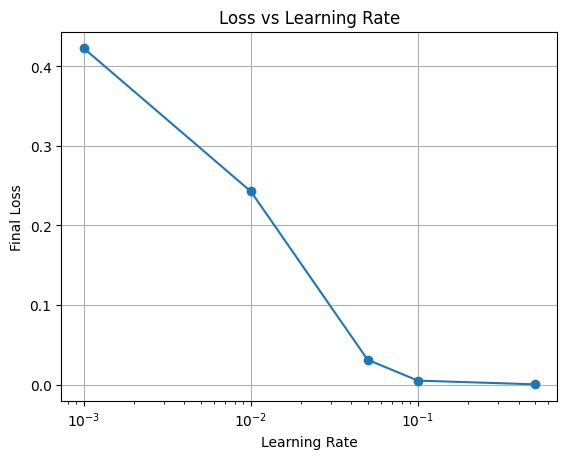

In [ ]:
#PART 8: Experiment with Learning Rates

learning_rates = [0.001, 0.01, 0.05, 0.1, 0.5]
final_losses = []

for lr in learning_rates:
    final_loss = train_mlp(lr)
    final_losses.append(final_loss)
# PART 9: Plot Graph
plt.plot(learning_rates, final_losses, marker='o')
plt.xscale('log')
plt.xlabel("Learning Rate")
plt.ylabel("Final Loss")
plt.title("Loss vs Learning Rate")
plt.grid()
plt.show()

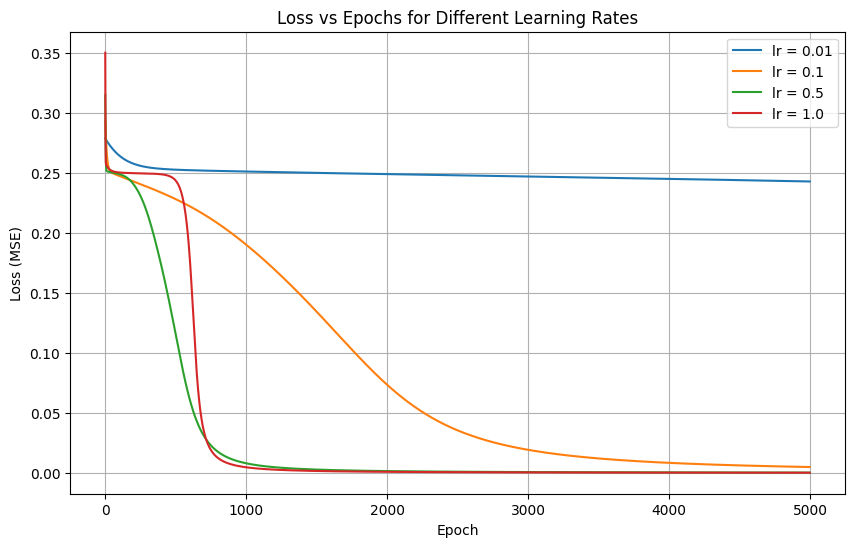

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid & derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Simple 1 hidden layer neural network
def train_and_record(X, y, lr, epochs=1000, hidden_size=4):
    input_size = X.shape[1]
    output_size = y.shape[1]

    # Random weights
    W1 = np.random.randn(input_size, hidden_size)
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size)
    b2 = np.zeros((1, output_size))

    losses = []

    for epoch in range(epochs):
        # Forward
        z1 = np.dot(X, W1) + b1
        a1 = sigmoid(z1)
        z2 = np.dot(a1, W2) + b2
        output = sigmoid(z2)

        # Loss (MSE)
        loss = np.mean((output - y) ** 2)
        losses.append(loss)

        # Backpropagation
        d_output = (output - y) * sigmoid_derivative(output)
        d_W2 = np.dot(a1.T, d_output)
        d_b2 = np.sum(d_output, axis=0, keepdims=True)

        d_hidden = np.dot(d_output, W2.T) * sigmoid_derivative(a1)
        d_W1 = np.dot(X.T, d_hidden)
        d_b1 = np.sum(d_hidden, axis=0, keepdims=True)

        # Update weights
        W2 -= lr * d_W2
        b2 -= lr * d_b2
        W1 -= lr * d_W1
        b1 -= lr * d_b1

    return losses


def compare_learning_rates(X, y, learning_rates, epochs=1000):
    plt.figure(figsize=(10, 6))

    for lr in learning_rates:
        losses = train_and_record(X, y, lr, epochs)
        plt.plot(losses, label=f"lr = {lr}")

    plt.title("Loss vs Epochs for Different Learning Rates")
    plt.xlabel("Epoch")
    plt.ylabel("Loss (MSE)")
    plt.legend()
    plt.grid(True)
    plt.show()
# Sample data (XOR)
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])

compare_learning_rates(X, y, learning_rates=[0.01, 0.1, 0.5, 1.0], epochs=5000)


## 10th Implement an MLP using the Gradient Descent algorithm, and analyze the convergence behavior and performance of the network

X shape: (1400, 4)
y shape: (1400, 1)
Unique y: [0 1]
Loss length: 500
First 5 losses: [np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan)]


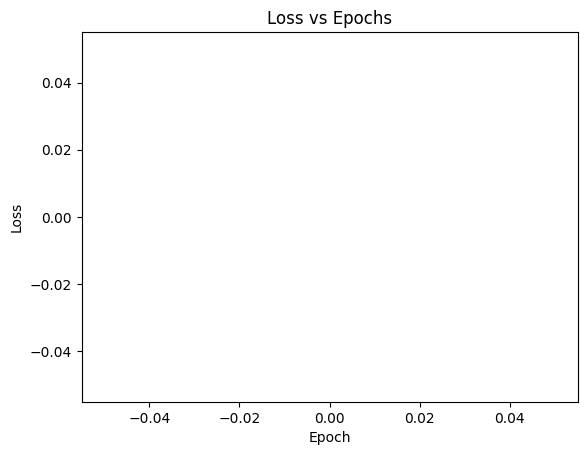

Accuracy: 0.9523809523809523


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# -------------------------------
# Load Dataset
# -------------------------------
df = pd.read_csv("TeluguMovies_dataset.csv")

# Make sure the columns exist
required_cols = ['Year', 'Runtime', 'Rating', 'No.of.Ratings']
for c in required_cols:
    if c not in df.columns:
        raise Exception(f"Missing column: {c}")

df = df[required_cols]
df['target'] = (df['Rating'] >= 8.1).astype(int)

X = df[['Year', 'Runtime', 'Rating', 'No.of.Ratings']].values
y = df['target'].values.reshape(-1, 1)

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Unique y:", np.unique(y))

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

# Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# -------------------------------
# Activation
# -------------------------------
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    x = np.clip(x, -500, 500)
    return 1 / (1 + np.exp(-x))


# -------------------------------
# Training
# -------------------------------
def train_mlp(X, y, hidden_size=8, lr=0.01, epochs=1000):
    input_size = X.shape[1]
    output_size = 1

    W1 = np.random.randn(input_size, hidden_size) * 0.01
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size) * 0.01
    b2 = np.zeros((1, output_size))

    losses = []

    for epoch in range(epochs):
        z1 = np.dot(X, W1) + b1
        a1 = relu(z1)

        z2 = np.dot(a1, W2) + b2
        output = sigmoid(z2)

        # Binary cross entropy loss
        loss = -np.mean(y * np.log(output + 1e-9) + (1 - y) * np.log(1 - output + 1e-9))
        losses.append(loss)

        # Backprop
        d_output = output - y
        d_W2 = np.dot(a1.T, d_output)
        d_b2 = np.sum(d_output, axis=0, keepdims=True)

        d_hidden = np.dot(d_output, W2.T)
        d_hidden[z1 <= 0] = 0

        d_W1 = np.dot(X.T, d_hidden)
        d_b1 = np.sum(d_hidden, axis=0, keepdims=True)

        # Update
        W2 -= lr * d_W2
        b2 -= lr * d_b2
        W1 -= lr * d_W1
        b1 -= lr * d_b1

    return W1, b1, W2, b2, losses


def predict_mlp(X, W1, b1, W2, b2):
    a1 = relu(np.dot(X, W1) + b1)
    output = sigmoid(np.dot(a1, W2) + b2)
    return (output > 0.5).astype(int)


# Train
W1, b1, W2, b2, losses = train_mlp(
    X_train, y_train,
    hidden_size=8,
    lr=0.01,
    epochs=500
)

print("Loss length:", len(losses))
print("First 5 losses:", losses[:5])

# Plot
plt.plot(losses)
plt.title("Loss vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# Accuracy
y_pred = predict_mlp(X_test, W1, b1, W2, b2)
print("Accuracy:", accuracy_score(y_test, y_pred))


In [ ]:
print(losses)

[np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(na

## used wine dataset


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# -------------------------------
# Load Wine dataset
# -------------------------------
data = load_wine()
X = data.data
y = data.target

# Convert to binary classification (0 vs others) for simplicity
y = (y == 0).astype(int).reshape(-1, 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# -------------------------------
# Activation functions
# -------------------------------
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def sigmoid(x):
    x = np.clip(x, -500, 500)
    return 1 / (1 + np.exp(-x))


# -------------------------------
# Train MLP
# -------------------------------
def train_mlp(X, y, hidden_size=8, lr=0.01, epochs=500):
    input_size = X.shape[1]
    output_size = 1

    W1 = np.random.randn(input_size, hidden_size) * 0.01
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size) * 0.01
    b2 = np.zeros((1, output_size))

    losses = []

    for epoch in range(epochs):
        z1 = np.dot(X, W1) + b1
        a1 = relu(z1)

        z2 = np.dot(a1, W2) + b2
        output = sigmoid(z2)

        # Binary cross entropy loss
        loss = -np.mean(y * np.log(output + 1e-9) + (1 - y) * np.log(1 - output + 1e-9))
        losses.append(loss)

        # Backprop
        d_output = output - y
        d_W2 = np.dot(a1.T, d_output)
        d_b2 = np.sum(d_output, axis=0, keepdims=True)

        d_hidden = np.dot(d_output, W2.T)
        d_hidden[z1 <= 0] = 0

        d_W1 = np.dot(X.T, d_hidden)
        d_b1 = np.sum(d_hidden, axis=0, keepdims=True)

        # Update
        W2 -= lr * d_W2
        b2 -= lr * d_b2
        W1 -= lr * d_W1
        b1 -= lr * d_b1

    return W1, b1, W2, b2, losses


def predict_mlp(X, W1, b1, W2, b2):
    a1 = relu(np.dot(X, W1) + b1)
    output = sigmoid(np.dot(a1, W2) + b2)
    return (output > 0.5).astype(int)


# Train
W1, b1, W2, b2, losses = train_mlp(
    X_train, y_train,
    hidden_size=8,
    lr=0.01,
    epochs=500
)

# Accuracy
y_pred_train = predict_mlp(X_train, W1, b1, W2, b2)
y_pred_test = predict_mlp(X_test, W1, b1, W2, b2)

print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

# Plot convergence
plt.plot(losses)
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()
